In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the 200x200 dataset

In [ ]:
cd ./drive/MyDrive/COVIDNORMALDATASET/

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation, AvgPool2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

##**Loading Data**

In [ ]:
from numpy import load,save
import numpy as np
X_train= np.load('./60DATA.npy')
y_train= np.load('./60LABELS.npy')
X_test=np.load('./40DATA.npy')
y_test=np.load('./40LABELS.npy')

**Loading External dataset1**

In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
ED1= np.load('./EXTERNAL2/External2Data.npy')
EL1= np.load('./EXTERNAL2/External2Labels.npy')

In [ ]:
ED1= X_test
EL1=y_test

In [ ]:
cd ./COVIDNORMALDATASET

/content/drive/My Drive/COVIDNORMALDATASET


**Building Model**

In [ ]:
cd ./COVIDNORMALDATASET/

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200

In [ ]:
model = Sequential()
model.add(Conv2D(42, (3,3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))            #convulational 2D layer
model.add(Activation('relu'))                                                   #Activation function RELU
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #MaxPooling 2D layer

model.add(Conv2D(42, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))

model.add(Flatten())                                                          #Flatten Layer
model.add(Dense(32))                                                          #Dense Layer previously 32
model.add(Dropout(0.20))                                                      # Dropout 20% previously .25
model.add(Dense(1))
model.add(Activation("sigmoid"))                                              #Activation Function Sigmoid

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 198, 42)      1176      
_________________________________________________________________
activation_9 (Activation)    (None, 198, 198, 42)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 42)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 97, 97, 42)        15918     
_________________________________________________________________
activation_10 (Activation)   (None, 97, 97, 42)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 42)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)       

In [ ]:
optim= tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Nadam',
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

In [ ]:
batch_size = 64 #batch size of 32 performs the best.
epochs = 10
history=model.fit(x=X_train, y=y_train,epochs=epochs, batch_size=batch_size)

Epoch 1/10
68/68 [==============================] - 13s 167ms/step - loss: 0.6589 - accuracy: 0.5918
Epoch 2/10
68/68 [==============================] - 9s 132ms/step - loss: 0.5697 - accuracy: 0.6992
Epoch 3/10
68/68 [==============================] - 9s 131ms/step - loss: 0.5210 - accuracy: 0.7338
Epoch 4/10
68/68 [==============================] - 9s 131ms/step - loss: 0.4913 - accuracy: 0.7640
Epoch 5/10
68/68 [==============================] - 9s 129ms/step - loss: 0.4461 - accuracy: 0.7838
Epoch 6/10
68/68 [==============================] - 9s 128ms/step - loss: 0.4106 - accuracy: 0.8036
Epoch 7/10
68/68 [==============================] - 9s 128ms/step - loss: 0.3692 - accuracy: 0.8285
Epoch 8/10
68/68 [==============================] - 9s 129ms/step - loss: 0.3502 - accuracy: 0.8398
Epoch 9/10
68/68 [==============================] - 9s 129ms/step - loss: 0.3180 - accuracy: 0.8560
Epoch 10/10
68/68 [==============================] - 9s 129ms/step - loss: 0.3129 - accuracy: 0.860

**Saving Model**

In [ ]:
# model1_yaml = model.to_yaml()
# with open("60model.yaml", "w") as yaml_file:
#     yaml_file.write(model1_yaml)
#     model.save("60model.h5")

#**Evaluation**

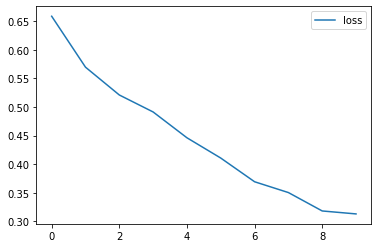

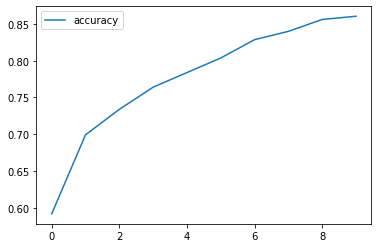

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df[['loss']].plot()
history_df[['accuracy']].plot()

**Making Predictions**

In [ ]:
y_pred = model.predict(ED1) #external testing

#**Recall Accuracy F1 Score**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
recall=round(recall_score(EL1, y_pred.round(), average='binary'),2)
accuracy= round(accuracy_score(EL1, y_pred.round()),2)
# precision= round(precision_score(y_test, y_pred.round(), average='binary'),2)
F1Score= round(f1_score(EL1, y_pred.round(), average='binary'),2)
print("recall=", recall,'F1Score =',F1Score,'accuracy=',accuracy)

recall= 0.79 F1Score = 0.85 accuracy= 0.86


**Classification Report**

In [ ]:
from sklearn.metrics import roc_auc_score,classification_report
print(classification_report(EL1, y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1414
         1.0       0.92      0.79      0.85      1479

    accuracy                           0.86      2893
   macro avg       0.86      0.86      0.86      2893
weighted avg       0.86      0.86      0.86      2893



#**Sensitivity, Specificity, Precision**

In [ ]:
import pandas as pd
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(EL1, y_pred.round())
# Assigning columns names
cm_df = pd.DataFrame(cm,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))

    # calculate precision
conf_precision = (TN / float(TN + FP))

print('-'*50)
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')


True Positives: 1172
True Negatives: 1307
False Positives: 107
False Negatives: 307
--------------------------------------------------
Sensitivity: 0.79
Specificity: 0.92
Precision: 0.92


**AUC Score**

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(EL1, y_pred[:])
print(round(auc_score1,2))

0.94


**ROC CURVE**

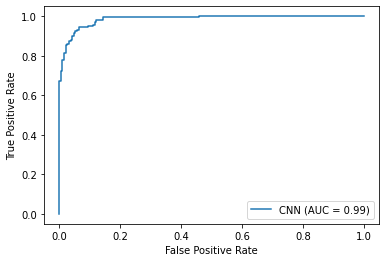

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(EL1, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='CNN')
display.plot()
# plt.savefig('E260ROC.png')
plt.show()

**Confusion Metrice**

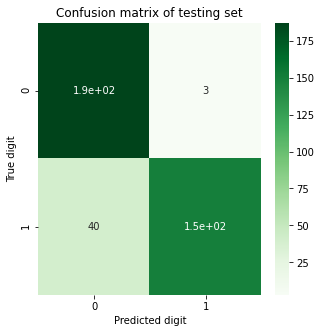

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import seaborn as sns

cnf_matrix = confusion_matrix(EL1, y_pred.round())
labels_array = ['0', '1']
fig, ax = plt.subplots(1,figsize=(5,5))
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(labels_array)
ax.set_yticklabels(labels_array)
plt.title('Confusion matrix of testing set')
plt.ylabel('True digit')
plt.xlabel('Predicted digit')
plt.savefig('E260CM.png')
plt.show();